#### Block 0A:  Import general purpose packages for ease of use and improved performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#### Block 0B:  Import packages for a typical deep learning workflow using TensorFlow and Keras. Import the MNIST image dataset, the IMDB movie review dataset, and the California housing market dataset from Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

#### Block 1:  Load the images in the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) database, rescale intensities from 0 to 255 to 0 to 1, divide the original training dataset into a training dataset and validation dataset, and display a sample of images from the training dataset.

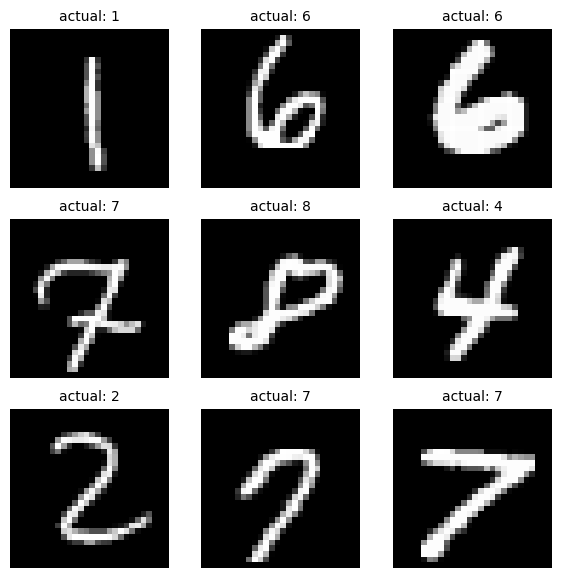

In [3]:
# Load the images in the MNIST database.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Rescale pixel values of images (intensities) from 0 to 255 to 0 to 1.
X_train, X_test = X_train/255, X_test/255

# Divide the training dataset into a training dataset and a validation
# dataset.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=0.1,
                                                  random_state=42)

# Display the first nine images from the training dataset.
fig, axs = plt.subplots(3, 3)
fig.set_size_inches((7, 7))

for i in range(3):
    for j in range(3):
        title = f'actual: {y_train[i*3+j]}'
        axs[i,j].imshow(X_train[i*3+j], cmap='gray')
        axs[i,j].set_title(title, fontsize=10)
        axs[i,j].axis('off')

fig.show()

#### Block 2:  Scale an interval.

In [4]:
x1 = float(input('Left hand endpoint:  '))
x2 = float(input('Right hand endpoint:  '))
xrange = x2 - x1
xmidpt = (x1 + x2) / 2

print(f"An interval with endpoints x1 = {x1} and x2 = {x2}, has range {xrange}",
      f"and midpoint {xmidpt}")


sf = float(input('Enter the constrast reduction factor:  '))
if sf <= 0 or sf >= 1:
    print(f'{sf} is out of range.')
else:
    dim_range = sf*xrange
    x1new = sf*(x1 - xmidpt) + xmidpt
    x2new = sf*(x2 - xmidpt) + xmidpt
    range_new = x2new - x1new
    midpt_new = (x1new + x2new)/2

print(f"The interval has endpoints x1 = {x1new} and x2 = {x2new},",
      f" range {range_new} and midpoint {midpt_new} after it is shrunk")

Left hand endpoint:  10
Right hand endpoint:  20
An interval with endpoints x1 = 10.0 and x2 = 20.0, has range 10.0 and midpoint 15.0
Enter the constrast reduction factor:  0.5
The interval has endpoints x1 = 12.5 and x2 = 17.5,  range 5.0 and midpoint 15.0 after it is shrunk


#### Block 3:  Implement and test a function to reduce contrast of a grayscale image.

Enter the constrast reduction factor:  0.15


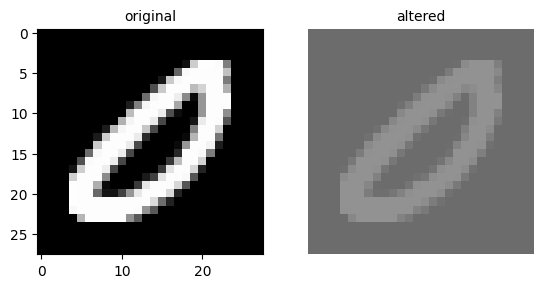

In [5]:
## Replace this comment with your explanation of the purpose of the
## following three lines of code.
## -> The function np.random.default_rng() in NumPy is used to create a random
##    number generator (RNG). It randomly picks an index from the X_train data
##    so that we can get the img data by accessing X_train at that index.
rng = np.random.default_rng()
idx = rng.choice(len(X_train))
img = X_train[idx]

## Replace this comment with your explanation of the purpose of the
## following three lines of code.
## -> So the code below will find the min and max pixel value scaled between 0
##    and 1, then apply the similar logic in block 2 to compute the interval and
##    the mid pixel value.
px_min, px_max = np.min(img), np.max(img)
xrange = px_max - px_min
midpt = (px_max + px_min)/2

## Replace this comment with your explanation of the purpose of the
## following code snippet.
## -> The code below will receive input of the scale factor and then change the
##    contrast of the image by multiplying all the pixel values by the scale
##    factor while keeping the pixel values within [0, 1]. Finally, simply
##    display a graph to compare the original and altered contrast images.
sf = float(input('Enter the constrast reduction factor:  '))
if sf <= 0 or sf >= 1:
    print(f'{sf} is out of range.')
else:
    dim_img = sf*(img - midpt) + midpt
    ## Compare the original (left) and altered (right) images visually.
    fig, axs = plt.subplots(1, 2)
    for i, (title, img_cf) in enumerate(zip(('original', 'altered'),
                                            (img, dim_img))):
        axs[i].set_title(title, fontsize=10)
        axs[i].imshow(img_cf, cmap='gray', vmin=0, vmax=1)
    axs[i].axis('off')
    fig.show()


#### Block 4:  Reduce the contrast of all the images in the MNIST dataset.

In [46]:
## Write code in the code cell of Block 4 that applies the ideas of Block 3 to
## the entire MNIST dataset (all of X_train and all of X_test.

## -> First, I will create a function that contain the logic from Block 3 for
##    reuse purpose
def reduce_image_contrast(images, scale_factor=0.087):
  dim_images = []

  for image in images:
    # Find the min and max pixel values and compute the mid point
    min_pixel_val, max_pixel_val = np.min(image), np.max(image)
    pixel_range = max_pixel_val - min_pixel_val
    mid_pixel_val = (max_pixel_val + min_pixel_val) / 2

    dim_image = scale_factor * (image - mid_pixel_val) + mid_pixel_val

    dim_images.append(dim_image)

  return np.array(dim_images)

reduced_X_train = reduce_image_contrast(X_train)
reduced_X_val = reduce_image_contrast(X_val)
reduced_X_test = reduce_image_contrast(X_test)

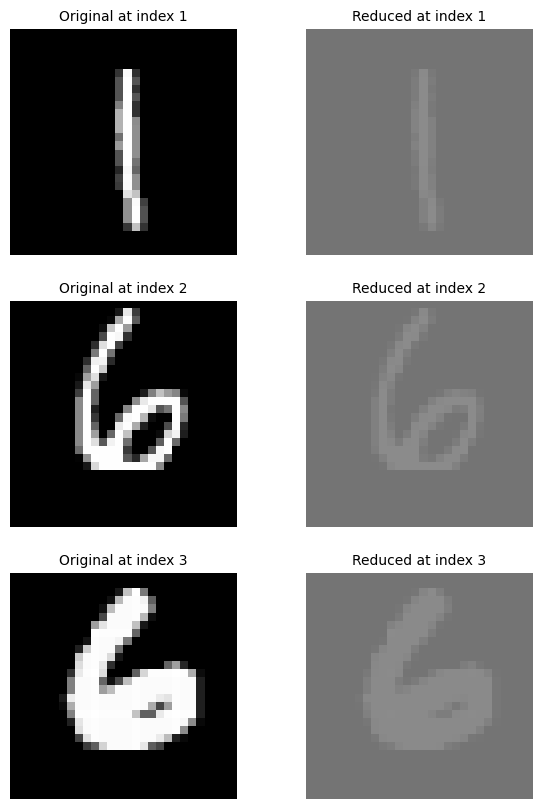

In [47]:
## Include an adapted version of the final code snippet of the code cell in
## Block 1 to compare three randomly selected images visually.
## -> Display the first 3 images from the training dataset.

fig, axs = plt.subplots(3, 2)
fig.set_size_inches((7, 10))

# Loop through the first 3 images of both X_train and reduced_X_train
for i in range(3):
  # Plot the original image in the first column
  axs[i, 0].set_title(f"Original at index {i+1}", fontsize=10)
  axs[i, 0].imshow(X_train[i], cmap='gray', vmin=0, vmax=1)
  axs[i, 0].axis('off')

  # Plot the reduced contrast image in the second column
  axs[i, 1].set_title(f"Reduced at index {i+1}", fontsize=10)
  axs[i, 1].imshow(reduced_X_train[i], cmap='gray', vmin=0, vmax=1)
  axs[i, 1].axis('off')

fig.show()

#### Block 5:  Define and compile the model.

In [48]:
# Define a model having an input layer that processes flattened 28 x 28 images,
# a hidden layer having 128 nodes, and an output layer having ten nodes that
# correspond to the digits 0, 1, 2, ..., 9.  The hidden layer has ReLU
# activation.  The output layer has softmax activation.
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model.  Use sparse categorical cross entropy as the loss function
# (to measure closeness of predicted image labels to actual image labels).
# Minimize the loss function using the Adam optimizer.  Measure performance
# using accuracy, which is (# correct predictions)/(# images).
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Block 6:  Train the model.

In [49]:
## Run the model on the reduced contrast images.
history = model.fit(reduced_X_train,
                    y_train,
                    epochs=10,
                    validation_data=(reduced_X_val, y_val))

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1307 - loss: 2.2973 - val_accuracy: 0.2600 - val_loss: 2.1483
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2577 - loss: 2.0775 - val_accuracy: 0.2988 - val_loss: 1.8956
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3044 - loss: 1.8720 - val_accuracy: 0.3512 - val_loss: 1.7655
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3529 - loss: 1.7464 - val_accuracy: 0.3892 - val_loss: 1.6742
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3866 - loss: 1.6482 - val_accuracy: 0.4003 - val_loss: 1.5680
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4069 - loss: 1.5583 - val_accuracy: 0.4122 - val_loss: 1.4766
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.4200 - loss: 1.4916 - val_accuracy: 0.4055 - val_loss: 1.4806
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4395 - loss: 1.4252

#### Block 7: Assess the performance of the model and plot the training history as accuracy vs epoch.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4489 - loss: 1.3449
Test Accuracy: 0.4636


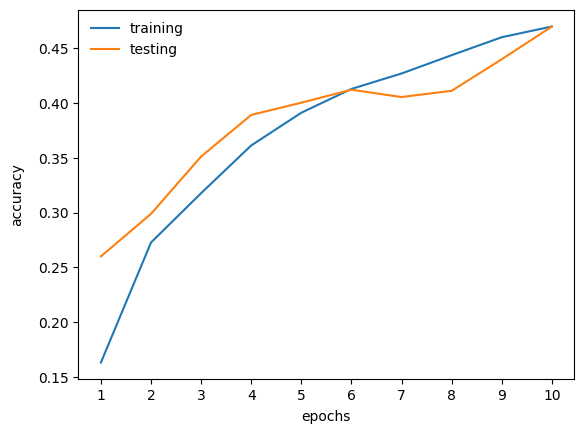

In [50]:
# Evaluate the performance of the model.
test_loss, test_acc = model.evaluate(reduced_X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot the training history as accuracy vs epoch.
fig, ax = plt.subplots()
ax.plot(history.history['accuracy'], label='training')
ax.plot(history.history['val_accuracy'], label='testing')
ax.set_xticks(range(10))
ax.set_xticklabels(list(range(1,11)))
ax.set_xlabel('epochs', labelpad=5)
ax.set_ylabel('accuracy', labelpad=10)
ax.legend(loc='best', frameon=False)
fig.show()

#### Block 8:  Predict digits for images in the testing dataset and display a small selection of the predictions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


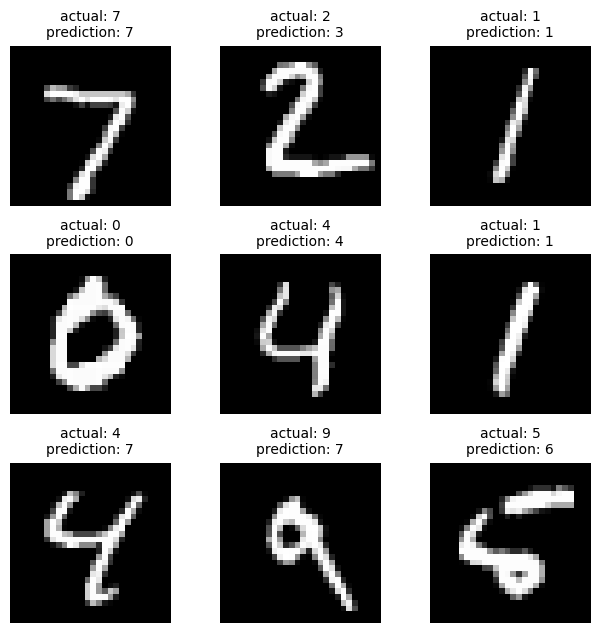

In [51]:
# Predict digits for images in the test dataset.
predictions = model.predict(reduced_X_test)

# Display the first nine digits and their actual and predicted values.
fig, axs = plt.subplots(3, 3)
fig.set_size_inches((7.5, 7.5))
for i in range(3):
    for j in range(3):
        title1 = f'actual: {y_test[i*3+j]}'
        title2 = f'prediction: {np.argmax(predictions[i*3+j])}'
        axs[i,j].imshow(reduced_X_test[i*3+j], cmap='gray')
        axs[i,j].set_title(title1 + '\n' + title2,
                           fontsize=10)
        axs[i,j].axis('off')
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.show()

In [ ]:
## Add a text cell as the last cell in your notebook in which you summarize the
## results of this experiment. The summary should include the scale factor you
## used to degrade the images, the test accuracy before and after degrading the
## images, and commentary about the model’s performance that reflects on how the
## model performed versus how well you think a typical person would perform when
## classifying the nine images displayed as predictions
## -> I tried to run the code many times with different scale factors, and I
##    noticed that when the scale factor is too low (close to zero, likely
##    between 0.01 and 0.05), the model couldn't make any correct predictions,
##    it predicted 1 for all numbers. However, starting at a scale factor of
##    0.9, the model's accuracy increased to 75%. So, I chose a scale factor of
##    0.87, which dropped the model's accuracy to 46%. As a result, some numbers
##    were not predicted correctly, such as the number 2, where the 2nd
##    position was predicted as 3, or the number 4, where the 7th position
##    was predicted as 7.
##
##    When I look at the numbers, I think I can guess most of them easily,
##    except for the number 0 at the fourth position and the number 5 at the 9th
##    position. I might incorrectly guess both of them as number 6.

##    I was not sure if it was because of the library, but when I ran the code
##    again with a scale factor of 0.87, the model sometimes produced bad
##    accuracy. However, in general, 0.87 was the factor that made the model's
##    accuracy drop to around 45%."